# Project Introduction

This project involves performing exploratory data analysis and time series analysis on an e-commerce customer dataset using Python. The objective is to understand customer behavior, analyze sales trends, evaluate marketing effectiveness, and study pricing patterns through data-driven insights.

The analysis focuses on business interpretation and statistical validation rather than machine learning models, ensuring that results are clear, explainable, and actionable. Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn are used to perform data manipulation, visualization, and hypothesis testing.

This notebook covers customer segmentation, sales forecasting using time series analysis, marketing campaign optimization, and price optimization, providing a structured analytical view aligned with real-world data analyst responsibilities.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## About DataSet Structure 

In [3]:
df = pd.read_csv(r"C:\Users\papus\OneDrive\Documents\Portfolio project 1\Ecommerce_Customer_Data01.csv")
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,01-01-2023,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,01-01-2023,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,01-01-2023,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,01-01-2023,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,01-01-2023,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


In [4]:
df.shape

(5000, 18)

In [7]:
print(df.columns)

Index(['Order_ID', 'Customer_ID', 'Date', 'Age', 'Gender', 'City',
       'Product_Category', 'Unit_Price', 'Quantity', 'Discount_Amount',
       'Total_Amount', 'Payment_Method', 'Device_Type',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer',
       'Delivery_Time_Days', 'Customer_Rating'],
      dtype='object')


## Data Cleaning 

In [8]:
print(df.dtypes)

Order_ID                     object
Customer_ID                  object
Date                         object
Age                           int64
Gender                       object
City                         object
Product_Category             object
Unit_Price                  float64
Quantity                      int64
Discount_Amount             float64
Total_Amount                float64
Payment_Method               object
Device_Type                  object
Session_Duration_Minutes      int64
Pages_Viewed                  int64
Is_Returning_Customer          bool
Delivery_Time_Days            int64
Customer_Rating               int64
dtype: object


In [10]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [11]:
print(df['Date'].dtypes)

datetime64[ns]


In [12]:
print(df.isnull().sum())

Order_ID                    0
Customer_ID                 0
Date                        0
Age                         0
Gender                      0
City                        0
Product_Category            0
Unit_Price                  0
Quantity                    0
Discount_Amount             0
Total_Amount                0
Payment_Method              0
Device_Type                 0
Session_Duration_Minutes    0
Pages_Viewed                0
Is_Returning_Customer       0
Delivery_Time_Days          0
Customer_Rating             0
dtype: int64


In [13]:
print(df.duplicated().sum())

0


In [15]:
df['Age_Bucket'] = pd.cut(
    df['Age'],
    bins=[17, 35, 55, 75],
    labels=['Adult', 'Mid-Senior', 'Senior'],
    right=True
)
df[['Age', 'Age_Bucket']].head()

,Age,Age_Bucket
0,27,Adult
1,42,Mid-Senior
2,43,Mid-Senior
3,32,Adult
4,40,Mid-Senior


In [17]:
tier_1_cities = ['Istandbul','Ankara','Izmir']
tier_2_cities = ['Antalya','Bursa','Adana','Gaziantep']
tier_3_cities = ['Konya','Kayseri','Eskisehir']

df['City_Tier'] = df['City'].apply(
    lambda x: 'Tier-1' if x in tier_1_cities 
    else 'Tier-2' if x in tier_2_cities 
    else 'Tier-3'
)

df[['City', 'City_Tier']].head()

,City,City_Tier
0,Bursa,Tier-2
1,Konya,Tier-3
2,Ankara,Tier-1
3,Istanbul,Tier-3
4,Istanbul,Tier-3


In [18]:
print(df.columns)

Index(['Order_ID', 'Customer_ID', 'Date', 'Age', 'Gender', 'City',
       'Product_Category', 'Unit_Price', 'Quantity', 'Discount_Amount',
       'Total_Amount', 'Payment_Method', 'Device_Type',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer',
       'Delivery_Time_Days', 'Customer_Rating', 'Age_Bucket', 'City_Tier'],
      dtype='object')


In [19]:
df['City_Tier'].value_counts()

City_Tier
Tier-3    2068
Tier-2    1597
Tier-1    1335
Name: count, dtype: int64

# Solving Buisness Questions

## Q.1::How are customers distributed across Age_Bucket and City_Tier, and which segments contribute the most revenue?


In [20]:
# distribution table
distribution = (
    df.groupby(['Age_Bucket', 'City_Tier'])
      .size()
      .reset_index(name='Customer_Count')
)
print(distribution)

   Age_Bucket City_Tier  Customer_Count
0       Adult    Tier-1             692
1       Adult    Tier-2             826
2       Adult    Tier-3            1121
3  Mid-Senior    Tier-1             596
4  Mid-Senior    Tier-2             708
5  Mid-Senior    Tier-3             863
6      Senior    Tier-1              47
7      Senior    Tier-2              63
8      Senior    Tier-3              84


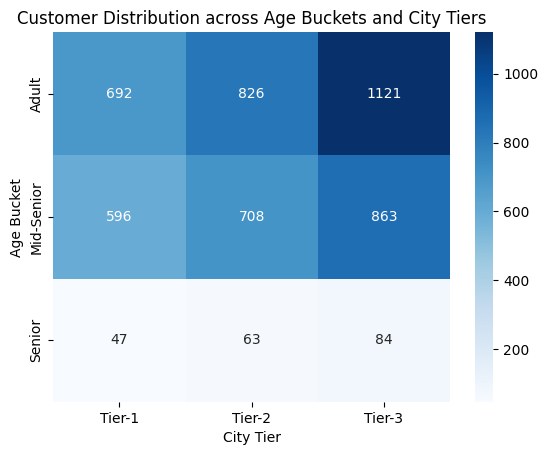

In [22]:
# Pivot for heatmap
dist_pivot = distribution.pivot(
    index='Age_Bucket',
    columns='City_Tier',
    values='Customer_Count'
)

sns.heatmap(dist_pivot, annot=True, fmt='d', cmap='Blues')
plt.title('Customer Distribution across Age Buckets and City Tiers')
plt.ylabel('Age Bucket')
plt.xlabel('City Tier')
plt.show()

In [23]:
revenue_segment = (
    df.groupby(['Age_Bucket', 'City_Tier'])['Total_Amount']
      .sum()
      .reset_index()
)
print(revenue_segment)

   Age_Bucket City_Tier  Total_Amount
0       Adult    Tier-1     627492.31
1       Adult    Tier-2     774624.05
2       Adult    Tier-3    1178957.60
3  Mid-Senior    Tier-1     537281.99
4  Mid-Senior    Tier-2     699123.62
5  Mid-Senior    Tier-3     917081.90
6      Senior    Tier-1      60296.19
7      Senior    Tier-2      46346.57
8      Senior    Tier-3      74340.34


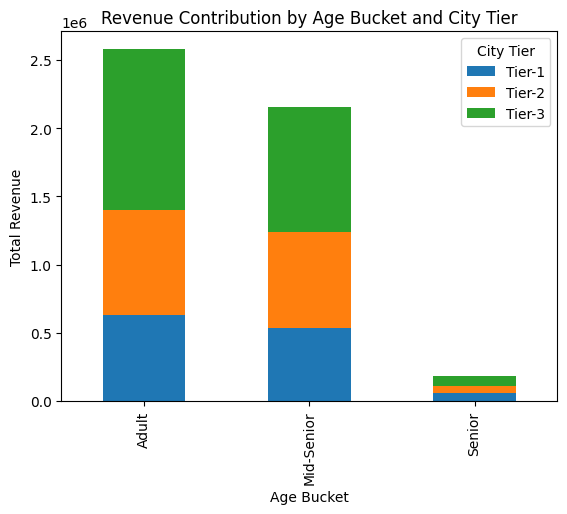

In [24]:
# Pivot for stacked bar
rev_pivot = revenue_segment.pivot(
    index='Age_Bucket',
    columns='City_Tier',
    values='Total_Amount'
)
rev_pivot.plot(kind='bar', stacked=True)
plt.title('Revenue Contribution by Age Bucket and City Tier')
plt.ylabel('Total Revenue')
plt.xlabel('Age Bucket')
plt.legend(title='City Tier')
plt.show()

## Q.2::Compare Average Order Value (AOV) across Age_Buckets and City_Tiers.??

In [25]:
# Calculate Average Order Value (AOV)
aov_segment = (
    df.groupby(['Age_Bucket', 'City_Tier'])['Total_Amount']
      .mean()
      .reset_index(name='AOV')
)
print(aov_segment)

   Age_Bucket City_Tier          AOV
0       Adult    Tier-1   906.780795
1       Adult    Tier-2   937.801513
2       Adult    Tier-3  1051.701695
3  Mid-Senior    Tier-1   901.479849
4  Mid-Senior    Tier-2   987.462740
5  Mid-Senior    Tier-3  1062.667323
6      Senior    Tier-1  1282.897660
7      Senior    Tier-2   735.659841
8      Senior    Tier-3   885.004048


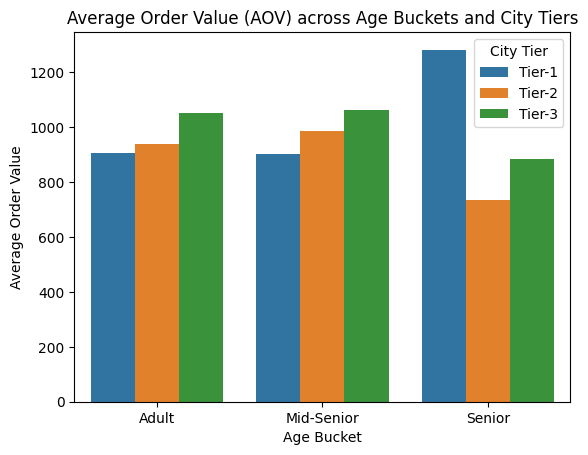

In [26]:
# Plot grouped bar chart
sns.barplot(
    data=aov_segment,
    x='Age_Bucket',
    y='AOV',
    hue='City_Tier'
)

plt.title('Average Order Value (AOV) across Age Buckets and City Tiers')
plt.xlabel('Age Bucket')
plt.ylabel('Average Order Value')
plt.legend(title='City Tier')
plt.show()

## Q.3::Which Age_Bucket has the highest percentage of returning customers?

In [27]:
# Calculate percentage of returning customers by Age_Bucket
returning_pct = (
    df.groupby('Age_Bucket')['Is_Returning_Customer']
      .mean()
      .reset_index(name='Returning_Percentage')
)
returning_pct['Returning_Percentage'] *= 100
print(returning_pct)

   Age_Bucket  Returning_Percentage
0       Adult             58.961728
1  Mid-Senior             60.867559
2      Senior             59.278351


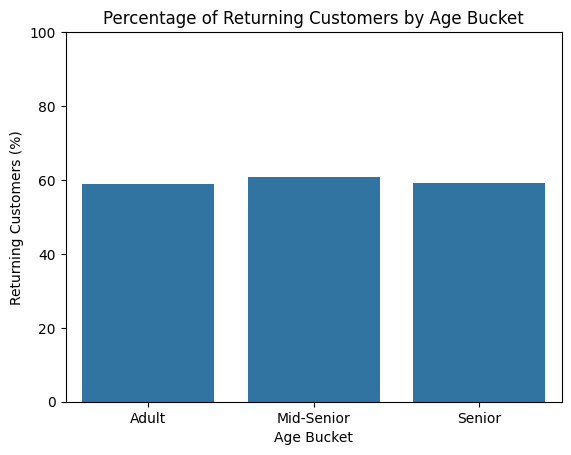

In [28]:
# Plot bar chart
sns.barplot(
    data=returning_pct,
    x='Age_Bucket',
    y='Returning_Percentage'
)
plt.title('Percentage of Returning Customers by Age Bucket')
plt.xlabel('Age Bucket')
plt.ylabel('Returning Customers (%)')
plt.ylim(0, 100)
plt.show()

## Q.4::How do session duration and pages viewed differ across Age_Buckets?

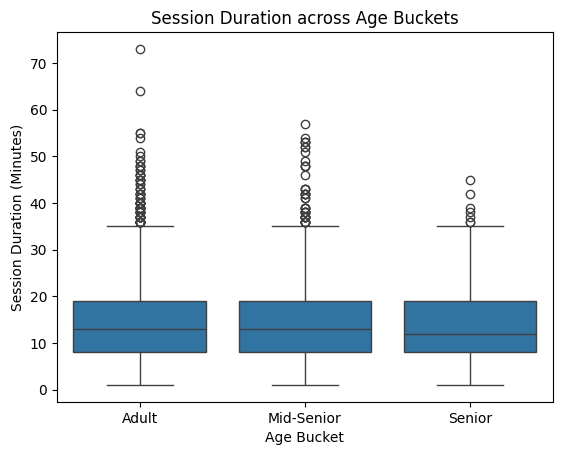

In [29]:
# Session Duration by Age_Bucket
sns.boxplot(
    data=df,
    x='Age_Bucket',
    y='Session_Duration_Minutes'
)
plt.title('Session Duration across Age Buckets')
plt.xlabel('Age Bucket')
plt.ylabel('Session Duration (Minutes)')
plt.show()

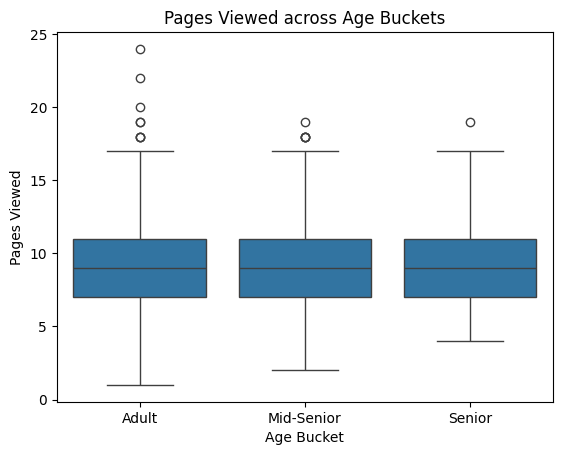

In [30]:
# Pages Viewed by Age_Bucket
sns.boxplot(
    data=df,
    x='Age_Bucket',
    y='Pages_Viewed'
)
plt.title('Pages Viewed across Age Buckets')
plt.xlabel('Age Bucket')
plt.ylabel('Pages Viewed')
plt.show()

## Q.5::Which Product Categories are preferred by different Age_Buckets?

In [31]:
# Count of orders by Age_Bucket and Product_Category
category_pref = (
    df.groupby(['Age_Bucket', 'Product_Category'])
      .size()
      .reset_index(name='Order_Count')
)
print(category_pref)

    Age_Bucket Product_Category  Order_Count
0        Adult           Beauty          333
1        Adult            Books          345
2        Adult      Electronics          323
3        Adult          Fashion          327
4        Adult             Food          331
5        Adult    Home & Garden          324
6        Adult           Sports          349
7        Adult             Toys          307
8   Mid-Senior           Beauty          261
9   Mid-Senior            Books          253
10  Mid-Senior      Electronics          279
11  Mid-Senior          Fashion          271
12  Mid-Senior             Food          266
13  Mid-Senior    Home & Garden          281
14  Mid-Senior           Sports          284
15  Mid-Senior             Toys          272
16      Senior           Beauty           27
17      Senior            Books           18
18      Senior      Electronics           22
19      Senior          Fashion           24
20      Senior             Food           22
21      Se

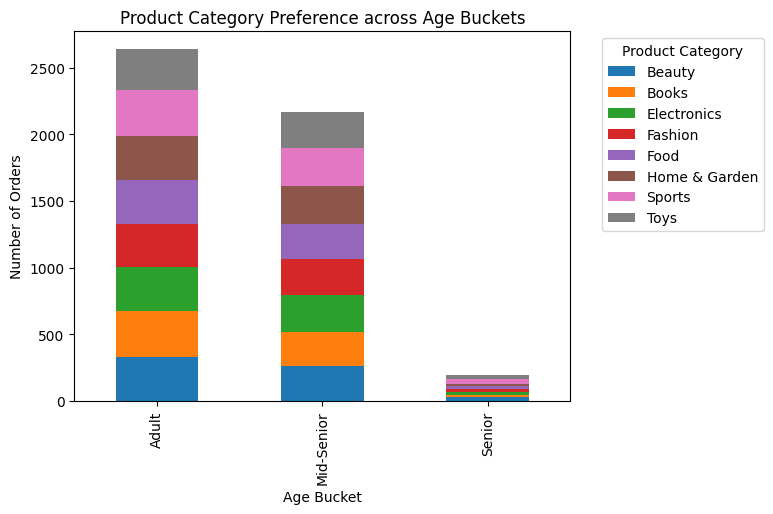

In [32]:
# Pivot for stacked bar chart
cat_pivot = category_pref.pivot(
    index='Age_Bucket',
    columns='Product_Category',
    values='Order_Count'
)

# Plot stacked bar chart
cat_pivot.plot(kind='bar', stacked=True)
plt.title('Product Category Preference across Age Buckets')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Orders')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Q.6::Convert order dates into a time series and analyze the overall revenue trend over time??

In [33]:
# Aggregate daily revenue
daily_revenue = (
    df.groupby('Date')['Total_Amount']
      .sum()
      .reset_index()
      .sort_values('Date')
)
print(daily_revenue)

          Date  Total_Amount
0   2023-01-01       9657.24
1   2023-01-02      14878.42
2   2023-01-03       5058.95
3   2023-01-04      32173.70
4   2023-01-05       6609.08
..         ...           ...
446 2024-03-22      12098.00
447 2024-03-23       7172.87
448 2024-03-24      13754.10
449 2024-03-25      12379.34
450 2024-03-26       1513.24

[451 rows x 2 columns]


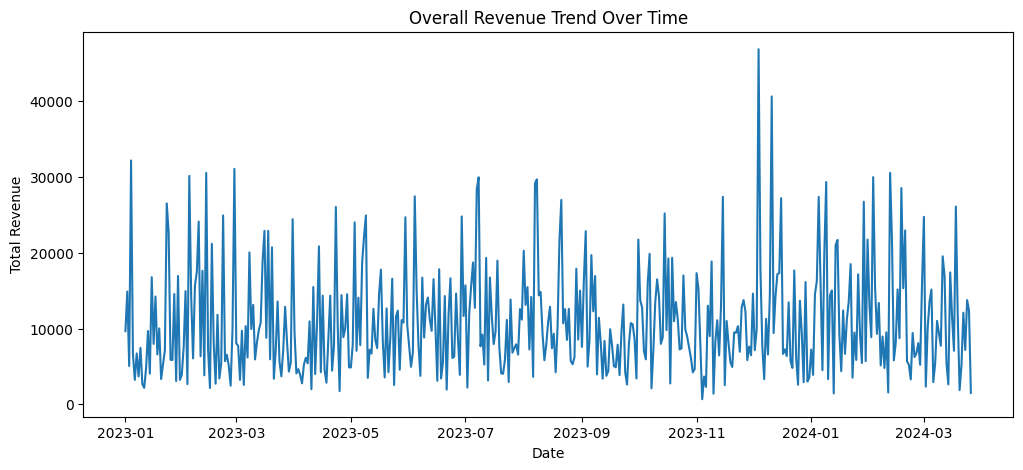

In [34]:
# Plot time series revenue trend
plt.figure(figsize=(12, 5))
plt.plot(daily_revenue['Date'], daily_revenue['Total_Amount'])
plt.title('Overall Revenue Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

## Q.7::Aggregate sales monthly and identify any seasonality or growth patterns.??

In [35]:
# Monthly revenue aggregation
monthly_revenue = (
    df.set_index('Date')
      .resample('M')['Total_Amount']
      .sum()
      .reset_index()
)
print(monthly_revenue)

         Date  Total_Amount
0  2023-01-31     286694.32
1  2023-02-28     338784.92
2  2023-03-31     321716.01
3  2023-04-30     257332.58
4  2023-05-31     351902.03
5  2023-06-30     324356.96
6  2023-07-31     346618.03
7  2023-08-31     391505.89
8  2023-09-30     262602.86
9  2023-10-31     352286.61
10 2023-11-30     282606.10
11 2023-12-31     384717.52
12 2024-01-31     396874.92
13 2024-02-29     342913.06
14 2024-03-31     274632.76


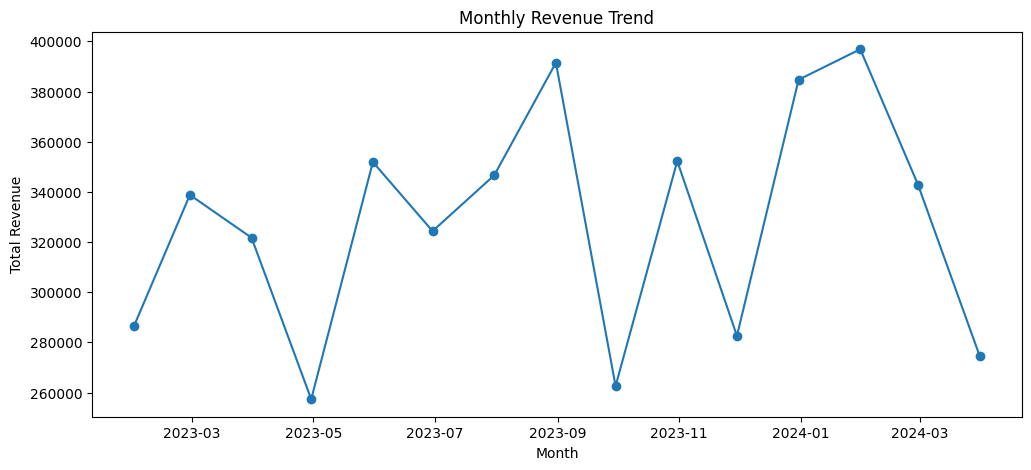

In [36]:
# Line chart: monthly revenue trend (growth)
plt.figure(figsize=(12, 5))
plt.plot(monthly_revenue['Date'], monthly_revenue['Total_Amount'], marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

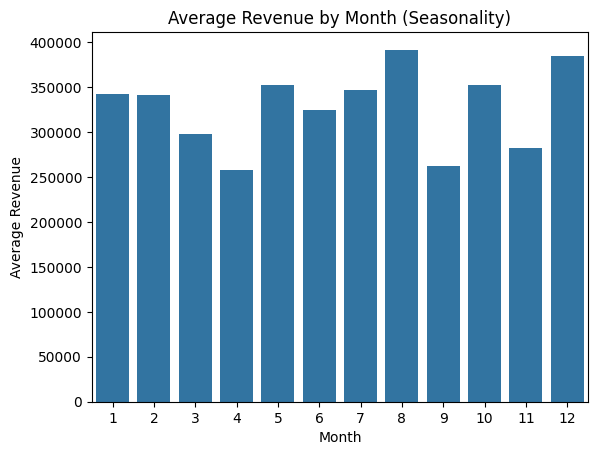

In [37]:
# Month-wise average revenue (seasonality)
monthly_revenue['Month'] = monthly_revenue['Date'].dt.month

seasonality = (
    monthly_revenue.groupby('Month')['Total_Amount']
    .mean()
    .reset_index()
)

sns.barplot(data=seasonality, x='Month', y='Total_Amount')
plt.title('Average Revenue by Month (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.show()

## Q.8::Plot a rolling average of revenue and interpret short-term future sales direction.

In [39]:
# Prepare daily revenue
daily_revenue = (
    df.groupby('Date')['Total_Amount']
      .sum()
      .sort_index()
)

# Calculate rolling average (7-day)
daily_revenue_rolling = daily_revenue.rolling(window=7).mean()
print(daily_revenue)


Date
2023-01-01     9657.24
2023-01-02    14878.42
2023-01-03     5058.95
2023-01-04    32173.70
2023-01-05     6609.08
                ...   
2024-03-22    12098.00
2024-03-23     7172.87
2024-03-24    13754.10
2024-03-25    12379.34
2024-03-26     1513.24
Name: Total_Amount, Length: 451, dtype: float64


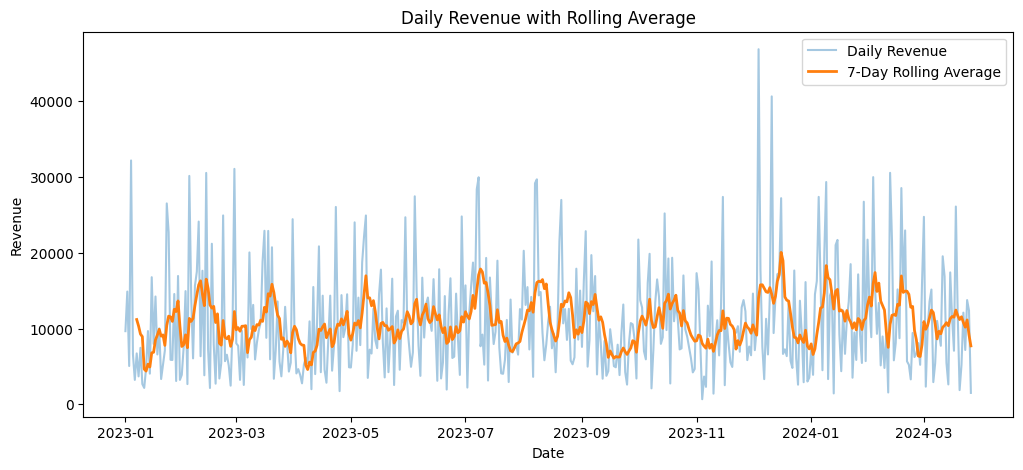

In [40]:
# Plot actual revenue vs rolling average
plt.figure(figsize=(12, 5))
plt.plot(daily_revenue.index, daily_revenue.values, alpha=0.4, label='Daily Revenue')
plt.plot(daily_revenue_rolling.index, daily_revenue_rolling.values, linewidth=2, label='7-Day Rolling Average')
plt.title('Daily Revenue with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

## Q.9::Compare revenue trends across City_Tiers over time??

In [41]:
# Aggregate monthly revenue by City_Tier
city_tier_monthly = (
    df.set_index('Date')
      .groupby('City_Tier')
      .resample('M')['Total_Amount']
      .sum()
      .reset_index()
)
print(city_tier_monthly)

   City_Tier       Date  Total_Amount
0     Tier-1 2023-01-31      73897.19
1     Tier-1 2023-02-28      83041.95
2     Tier-1 2023-03-31      60491.36
3     Tier-1 2023-04-30      46802.70
4     Tier-1 2023-05-31     103490.53
5     Tier-1 2023-06-30      72486.19
6     Tier-1 2023-07-31      79596.03
7     Tier-1 2023-08-31      86290.88
8     Tier-1 2023-09-30      91283.74
9     Tier-1 2023-10-31      83892.80
10    Tier-1 2023-11-30      68290.98
11    Tier-1 2023-12-31      96098.28
12    Tier-1 2024-01-31     100216.57
13    Tier-1 2024-02-29      83213.72
14    Tier-1 2024-03-31      95977.57
15    Tier-2 2023-01-31      76820.47
16    Tier-2 2023-02-28      91483.13
17    Tier-2 2023-03-31     122998.91
18    Tier-2 2023-04-30      99714.86
19    Tier-2 2023-05-31      92779.32
20    Tier-2 2023-06-30      93927.93
21    Tier-2 2023-07-31     116476.80
22    Tier-2 2023-08-31     116893.29
23    Tier-2 2023-09-30      82110.23
24    Tier-2 2023-10-31     119467.71
25    Tier-2

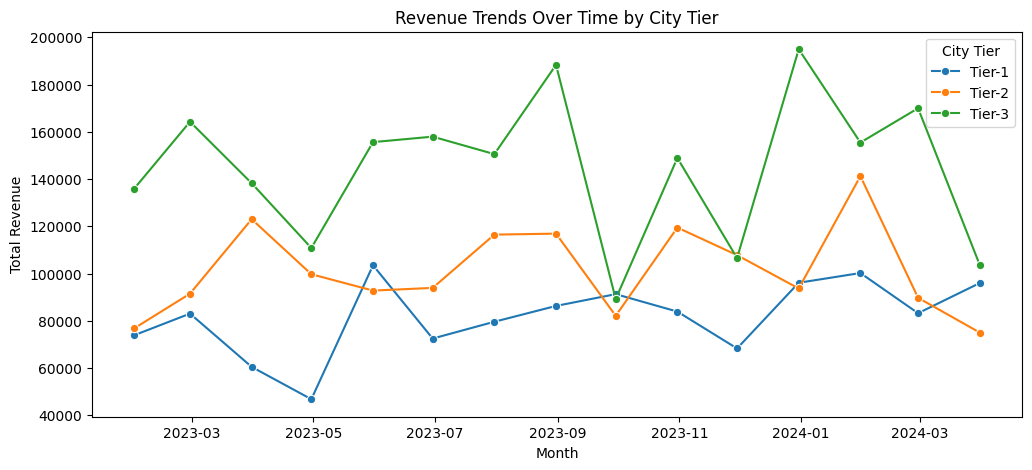

In [42]:
# Plot revenue trends for each City_Tier
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=city_tier_monthly,
    x='Date',
    y='Total_Amount',
    hue='City_Tier',
    marker='o'
)

plt.title('Revenue Trends Over Time by City Tier')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='City Tier')
plt.show()

## Time Series Analysis

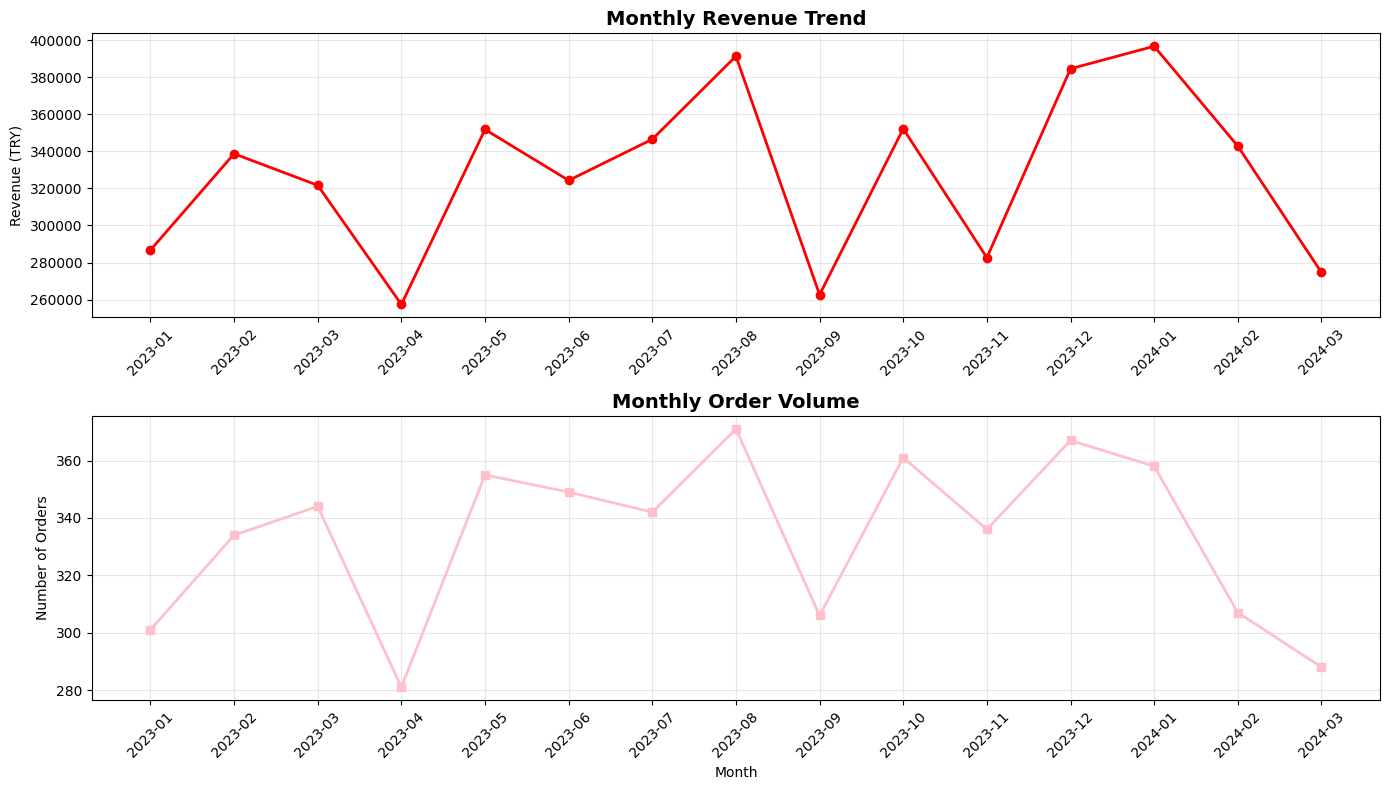

In [44]:
# Monthly trends
df['Year_Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Year_Month').agg({
    'Total_Amount': 'sum',
    'Order_ID': 'count'
}).reset_index()
monthly_sales['Year_Month'] = monthly_sales['Year_Month'].astype(str)

fig, axes = plt.subplots(2, 1, figsize=(14, 8))
# Revenue over time
axes[0].plot(monthly_sales['Year_Month'], monthly_sales['Total_Amount'], 
             marker='o', linewidth=2, color='red')
axes[0].set_title('Monthly Revenue Trend', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Revenue (TRY)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)
# Orders over time
axes[1].plot(monthly_sales['Year_Month'], monthly_sales['Order_ID'], 
             marker='s', linewidth=2, color='pink')
axes[1].set_title('Monthly Order Volume', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Orders')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Q.10::Compare AOV and quantity purchased for discounted vs non-discounted orders??

Average Order Value (AOV) Comparison

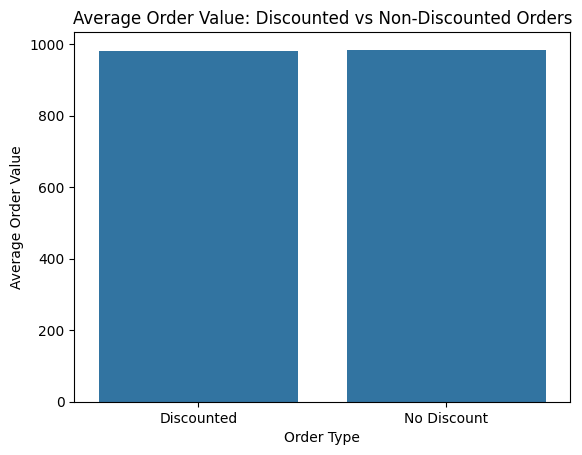

In [45]:
# Create discount flag
df['Discount_Flag'] = df['Discount_Amount'].apply(
    lambda x: 'Discounted' if x > 0 else 'No Discount'
)

# Calculate AOV
aov_discount = (
    df.groupby('Discount_Flag')['Total_Amount']
      .mean()
      .reset_index(name='AOV')
)

# Plot AOV comparison
sns.barplot(
    data=aov_discount,
    x='Discount_Flag',
    y='AOV'
)
plt.title('Average Order Value: Discounted vs Non-Discounted Orders')
plt.xlabel('Order Type')
plt.ylabel('Average Order Value')
plt.show()


Quantity Purchased Comparison

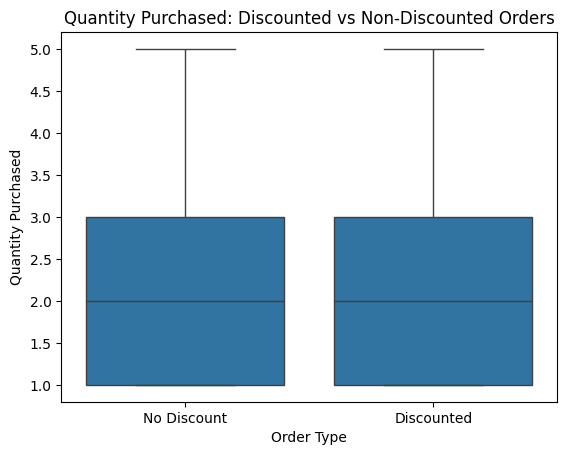

In [46]:
sns.boxplot(
    data=df,
    x='Discount_Flag',
    y='Quantity'
)
plt.title('Quantity Purchased: Discounted vs Non-Discounted Orders')
plt.xlabel('Order Type')
plt.ylabel('Quantity Purchased')
plt.show()


## Q.11::Are discounts more effective for new customers or returning customers?

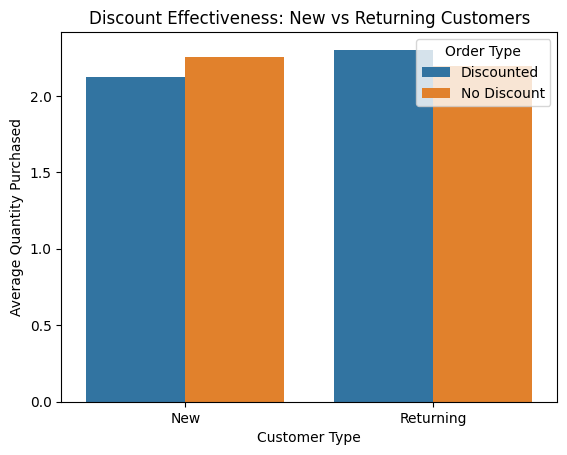

In [47]:
# Discount flag already assumed to exist
# Create customer type label
df['Customer_Type'] = df['Is_Returning_Customer'].apply(
    lambda x: 'Returning' if x else 'New'
)

# Calculate average quantity by customer type & discount flag
discount_effect = (
    df.groupby(['Customer_Type', 'Discount_Flag'])['Quantity']
      .mean()
      .reset_index(name='Avg_Quantity')
)

# Plot grouped bar chart
sns.barplot(
    data=discount_effect,
    x='Customer_Type',
    y='Avg_Quantity',
    hue='Discount_Flag'
)

plt.title('Discount Effectiveness: New vs Returning Customers')
plt.xlabel('Customer Type')
plt.ylabel('Average Quantity Purchased')
plt.legend(title='Order Type')
plt.show()

## Q.12::Hypothesis Test:Do discounted orders lead to a significant increase in quantity purchased?

In [52]:
from scipy import stats


In [53]:
# Split quantity by discount flag
discounted_qty = df[df['Discount_Amount'] > 0]['Quantity']
non_discounted_qty = df[df['Discount_Amount'] == 0]['Quantity']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(
    discounted_qty,
    non_discounted_qty,
    equal_var=False
)

t_stat, p_value


(np.float64(0.313521019701495), np.float64(0.7539073049775453))

## Business Interpretation

We fail to reject the null hypothesis.
There is no statistically significant evidence that discounted orders lead to a higher quantity purchased compared to non-discounted orders.

“Although discounted orders may show some variation in quantity, statistical testing indicates that discounts do not significantly increase the number of units purchased. This suggests discounts may be influencing purchase decisions in ways other than increasing basket size, such as customer acquisition or conversion.”

## Q.13::Analyze the relationship between Unit Price and Quantity across Product Categories??

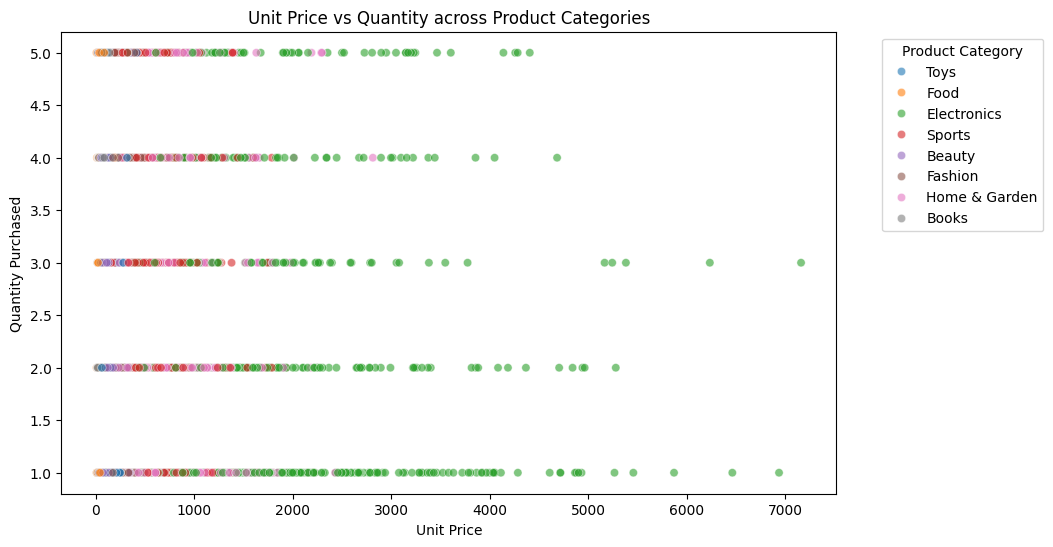

In [54]:
# Scatter plot: Unit Price vs Quantity by Product Category
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Unit_Price',
    y='Quantity',
    hue='Product_Category',
    alpha=0.6
)

plt.title('Unit Price vs Quantity across Product Categories')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Purchased')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Q.14::Hypothesis Test:Does Age_Bucket have a significant impact on customer spending behavior?

In [55]:
# Split spending by Age_Bucket
adult_spend = df[df['Age_Bucket'] == 'Adult']['Total_Amount']
mid_senior_spend = df[df['Age_Bucket'] == 'Mid-Senior']['Total_Amount']
senior_spend = df[df['Age_Bucket'] == 'Senior']['Total_Amount']

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(adult_spend, mid_senior_spend, senior_spend)

f_stat, p_value

(np.float64(0.11124224215885611), np.float64(0.8947241989644258))

## Business Interpretation

There is no statistically significant difference in average spending across Adult, Mid-Senior, and Senior customers.

In practical terms:

Age alone is not a strong driver of spending

Pricing and campaigns should not rely only on age

Other factors (city tier, category, loyalty) matter more

## Q.15::Hypothesis Test:Does delivery time significantly affect customer ratings, and how strong is this relationship?

In [56]:
# Correlation test between Delivery Time and Customer Rating
corr_coeff, p_value = stats.spearmanr(
    df['Delivery_Time_Days'],
    df['Customer_Rating']
)

corr_coeff, p_value


(np.float64(-0.015723595209454728), np.float64(0.2663029443569588))

## Business Interpretation

Delivery time does not significantly impact customer ratings in this dataset.

What this implies:

Customers may tolerate delivery delays

Ratings could be influenced more by:

Product quality

Price

Expectations

Category type

In [59]:
df['Year_Month'] = df['Year_Month'].astype(str)

In [60]:
from sqlalchemy import create_engine


username = "postgres"


password = "Papu1993"


host     = "localhost"


port     = "5432"


database = "E_commerce.db"          


engine = create_engine(
    f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"
)


table_name = "customers"


df.to_sql(table_name, engine, if_exists="replace", index=False)


print(f"Data successfully loaded into table:customers")

Data successfully loaded into table:customers
